# MNIST Tensorflow Quick Intro

_Copied from [TensorFlow Tutorials](https://www.tensorflow.org/tutorials/quickstart/beginner)_

Shows quick intro to TF using [MNIST dataset](http://yann.lecun.com/exdb/mnist/). First, import `tensorflow` and convert samples from integers -> FP

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0

The MNIST dataset is a series of handwritten numbers for use with models to learn to classify handwritten digits.

Expected digits:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]
Handwritten digits:


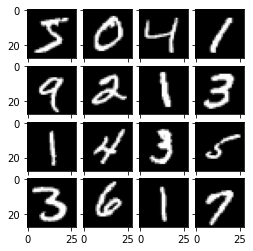

In [2]:
# add dimension for plotting digits
x_3d = x_train[...,tf.newaxis]
im_list = []
num_samples = 16
for i in range(num_samples):
    im_list.append(x_3d[i])

print("Expected digits:")
print(y_train[0:num_samples])
print("Handwritten digits:")

fig  = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                 nrows_ncols=(4, 4), # creates 2x2 grid of axes
                 axes_pad=0.1, # pad between axes in inch
                )
for ax, im in zip(grid, im_list):
    ax.imshow(im[:,:,0], 'gray')
plt.show()

Build Keras sequential model by stacking layers. Also choose optimizer and loss function for training:

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "logits"/"log-odds" scores for each class:

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.10870504, -0.15182695,  0.13844617, -0.30598292, -0.5792349 ,
         0.6669086 , -0.85908574,  0.1912398 ,  0.11635406, -0.03137178]],
      dtype=float32)

The `tf.nn.softmax` function converts logits -> "probabilities" for each class (**NOTE:** while one could have `softmax` as part of the activation function for the last layer of the network, it is discouraged as its impossible to provide an exact and numerically stable loss calculation for all models in that case):

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.110443  , 0.08511195, 0.11377702, 0.07295272, 0.0555098 ,
        0.19300249, 0.04195967, 0.11994512, 0.11129101, 0.09600715]],
      dtype=float32)

`losses.SparseCategoricalCrossentropy` converts a vector of logits and returns a scalar loss for each example. The loss is equal to the negative log probability of the true class (zero if the model is sure of the correct class).

Thus, the untrained model gives probabilities close to random (0.1 for each class), so initial loss should be close to $$-\log(0.1) \approx 2.3$$

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

1.6450522

Compile the model and fit to minimize loss across 5 epochs:

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2986 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1472 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1106 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0910 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0794 - accuracy: 0.9754


The `evaluate` method checks the models performance against a validation or test set, and shows our trained accuracy on the dataset:

In [8]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0797 - accuracy: 0.9752


[0.0796571895480156, 0.9751999974250793]